## **Εξαγωγή χαρακτηριστηκών ήχου**

**RMS Ενέργεια (Root Mean Square Energy)**



In [16]:
#Εισαγωγή βιβλιοθηκών

import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Αρχικοποίηση μήκους πλαισίου,μήκους βήματος 
FRAME_SIZE=512 
HOP_LENGTH=256

#Όταν το βήμα είναι μισό του μήκους πλαισίου έχουμε 50% επικάλυψη πλαισίων

> H βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html) μας δίνει την δυνατότητα να φορτώσουμε ένα αρχείο ήχου με την εντολή [librosa.load](https://librosa.org/doc/main/generated/librosa.load.html) συναρτήσει του χρόνου.

Για την ανάγνωση αρχείων στο Google Collab προτείνεται η διαδικασία που φαίνεται εδώ: https://neptune.ai/blog/google-colab-dealing-with-files

In [18]:
#Αρχικοποίηση αρχείων/δειγμάτων
file_path=("/content/piano C#.wav")
audio_sample, sr =librosa.load(file_path)

Για την εξυπηρέτηση των αναγκών της εγασίας αυτής, προτιμήθηκε η χρήση αρχείων μικρής διάρκειας και μίας νότας. 

*Αν θέλαμε να φορτώσουμε κάποιο δοκιμαστικό αρχείο ήχου από την βιλβιοθήκη librosa :*


```
filename= librosa.ex('trumpet')
audio_sample, sr =librosa.load(filename)

```











> Στην συνέχεια μπορούμε να αναπαράγουμε το σήμα μέσω της βιβλιοθήκης [IPython](https://ipython.org/).



In [19]:
#Αναπαραγωγή ήχου
ipd.Audio(data=audio_sample,rate=sr)

> **Υπολογισμός RMS Ενέργειας με την βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html).**




> Για πηγαίο κώδικα [librosa.feature.rms](https://librosa.org/doc/main/generated/librosa.feature.rms.html#librosa.feature.rms)

In [20]:
rms_audio_sample=librosa.feature.rms(audio_sample,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]

Text(0.5, 1.0, 'Trumpet sample RMS Energy with the librosa function')

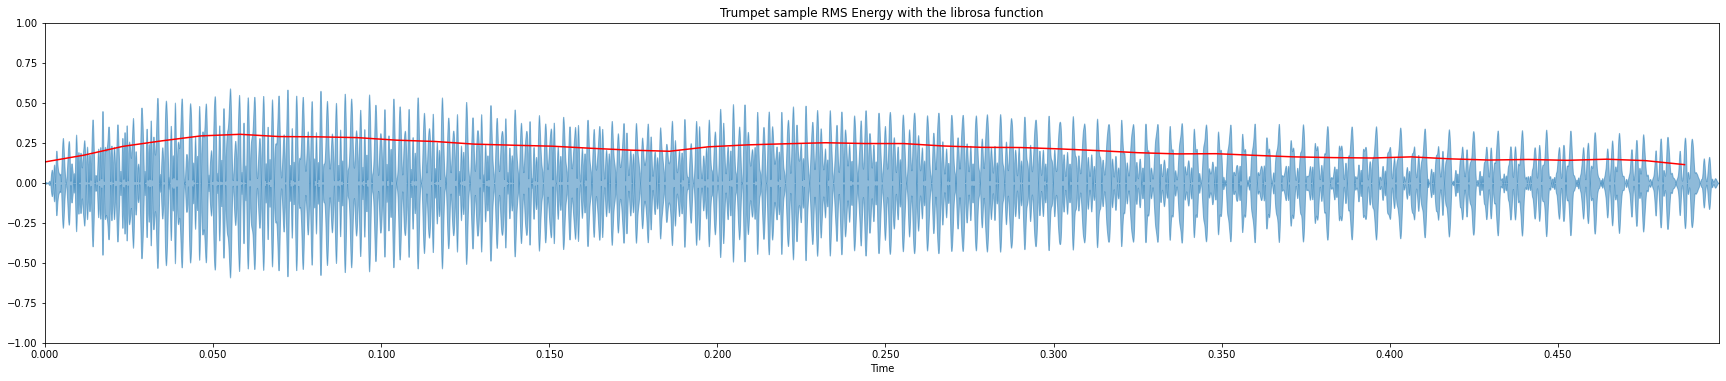

In [21]:
#Μετατροπή πλαισίων σε χρόνο
frames = range(len(rms_audio_sample))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

#Ορισμός μεγέθους διαγράμματος
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)

#Αναπαράσταση RMS ενέργειας πάνω από την κυματομορφή του σήματος
librosa.display.waveplot(audio_sample, alpha=0.5)
plt.plot(t, rms_audio_sample, color="r")
plt.ylim((-1, 1))
plt.title("Trumpet sample RMS Energy with the librosa function")

> **Υπολογισμός RMS Ενέργειας με δική μας συνάρτηση**


> Για να υπολογίσουμε την RMS ενέργεια ολόκληρου του σήματος, το χωρίζουμε σε πλαίσια και υπολογίζουμε την ενέργεια για κάθε πλαίσιο ως: SQRT( (1/n) * Σ(|n|^2) )





Η ενέργεια του σήματος ορίζεται ώς:

$$ \sum_n \left| x(n) \right|^2 $$

Η RMS ενέργεια του σήματος ορίζεται ως:
$$ \sqrt{ \frac{1}{N} \sum_n \left| x(n) \right|^2 } $$

In [22]:
def rmse(signal, frame_size, hop_length):

    #Δημιουργία κενής λίστας
    rmse = []
    #Υπολογισμός ενέργεις για κάθε πλαίσιο
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)

        #προσάρτηση της τιμής της ενέργειας για το τρέχον πλαίσιο στη λίστα
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [23]:
#Υπολογισμός RMS ενέργειας με δική μας συνάρτηση
my_rms_audio_sample = rmse(audio_sample, FRAME_SIZE, HOP_LENGTH)

Text(0.5, 1.0, 'Trumpet sample RMS Energy with our function')

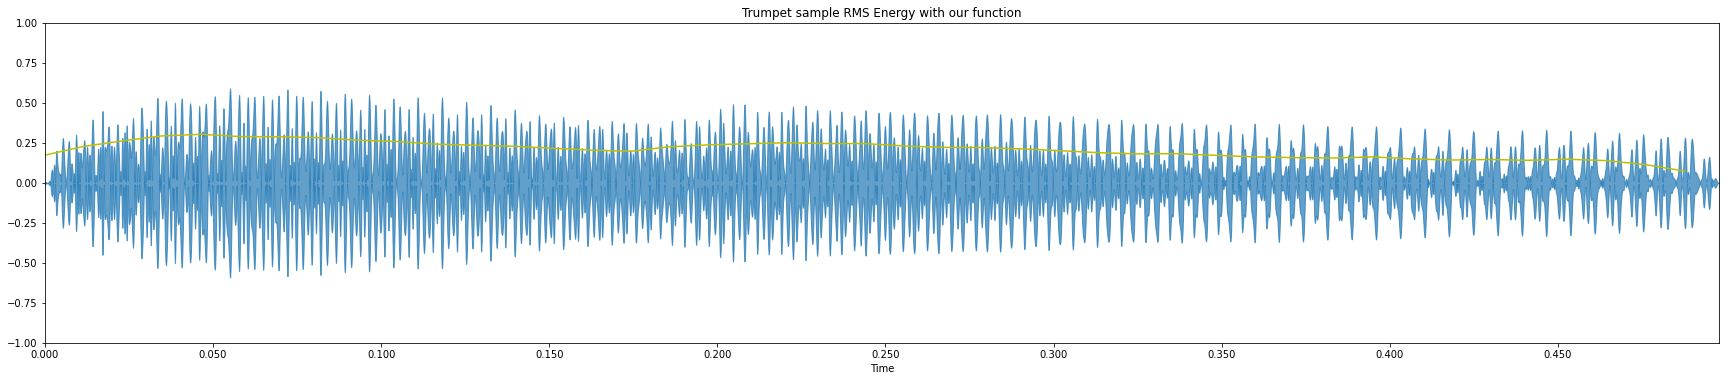

In [24]:
#Μετατροπή πλαισίων σε χρόνο
frames = range(len(my_rms_audio_sample))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

#Ορισμός μεγέθους διαγράμματος
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)

#Αναπαράσταση RMS ενέργειας πάνω από την κυματομορφή του σήματος
librosa.display.waveplot(audio_sample, alpha=0.7)
plt.plot(t, my_rms_audio_sample, color="y")
plt.ylim((-1, 1))
plt.title("Piano sample RMS Energy with our function")

Text(0.5, 1.0, 'Trumpet sample RMS Energy')

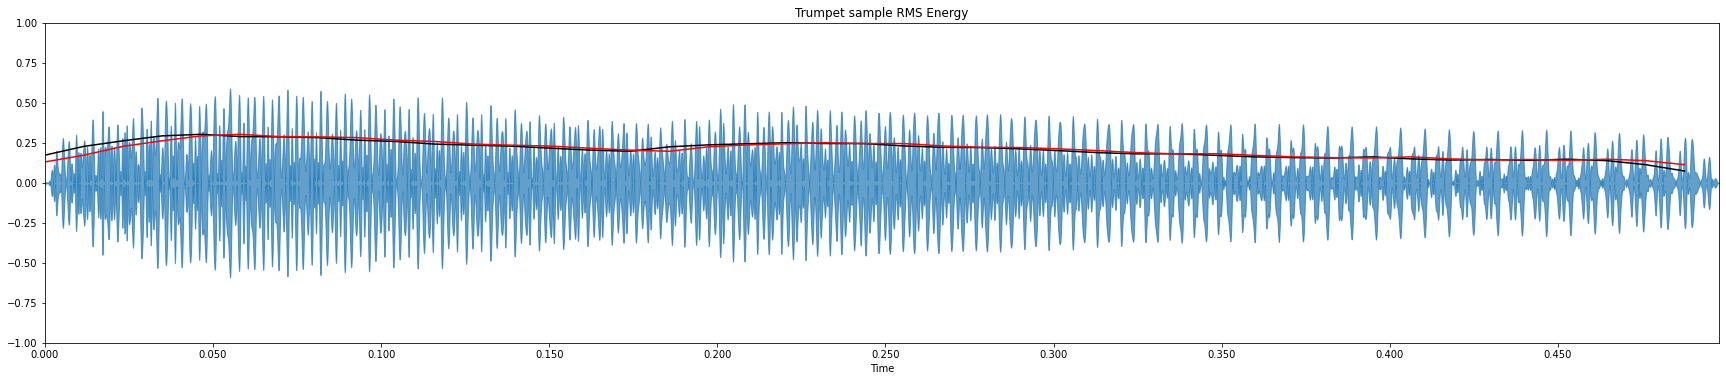

In [28]:
#Ορισμός μεγέθους διαγράμματος
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)

#Αναπαράσταση RMS ενέργειας πάνω από την κυματομορφή του σήματος
librosa.display.waveplot(audio_sample, alpha=0.7)
plt.plot(t, my_rms_audio_sample, color="k")
plt.plot(t, rms_audio_sample, color="r")
plt.ylim((-1, 1))
plt.title("Piano sample RMS Energy")